In [1]:
import numpy as np
import pandas as pd
from pandas import DataFrame, Series

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

%matplotlib inline

In [2]:
# Importing the dataset
df = pd.read_csv("../../archive/Ads_CTR_Optimisation.csv")

In [3]:
# Quick look on the dataset
df.head()

,Ad 1,Ad 2,Ad 3,Ad 4,Ad 5,Ad 6,Ad 7,Ad 8,Ad 9,Ad 10
0,1,0,0,0,1,0,0,0,1,0
1,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0


- Story: The company has placed 10 similar ads. Thus, the company now wants to find info. on the best ads based on the # of times people clicked on the ads
- This example is unlike before. We either had some independent values that helped predict the outcome. Or, we had independent variables that were clustered. 
- Recall that the data will not occur. Meaning, for this problem, there's no dataset to evaulate!
- Premise: We have 10,000 users. We show them ads and try to understand if they clicked on an ad or not
- We need some strategy to find the most optimal ad to display to the user
- The info. in the dataset shows info on what the user will click but we do not have any way to predict the ad the user will click
- This model is based on the total score at the end of the program!

In [4]:
# Implementing Random Selection
import random
N = 10000
d = 10
ads_selected = []
total_reward = 0
for n in range(0, N):
    ad = random.randrange(d)
    ads_selected.append(ad)
    reward = df.values[n, ad]

    total_reward = total_reward + reward
print('Random Selection (Total Rewards): {0}'.format(total_reward))


Random Selection (Total Rewards): 1222


In [12]:
# Implementing the Thomas Sampling (from scratch)
# d: Total number of ads
# N: Total number of rounds
# For the first 10 rounds, the upper bound will be 1e400 (for each ad placement)     

N = 10000
d = 10

# Creating vectors of d limits to keep track how these rewards are performing
# theta(i) - # of successes

number_of_reward_1 = np.zeros(d)
number_of_reward_0 = np.zeros(d)
total_reward = 0

ads_selectors = []

# For looping through each round (or each time a player is presented with the ad)
# Initiating the ad and max upper bound (will be using these as references)
# We are assigning prob. to each of the ads (calculating the prob. of success)
for n in range(0, N):
    ad = 0
    max_random = 0
    
    for i in range(0, d):
        # Picking random draws of the distribution for the ads
        random_beta = random.betavariate(number_of_reward_1[i] + 1, number_of_reward_0[i] + 1)
        
        if random_beta > max_random:
            max_random = random_beta
            ad = i
    
    # Storing the ad that was selected and evaulating it with the actual from the dataset
    ads_selectors.append(ad)
    reward = df.values[n, ad]
    
    if reward == 1:
        number_of_reward_1[ad] += 1
    else:
        number_of_reward_0[ad] += 1
        
    total_reward = total_reward + reward

In [17]:
from collections import Counter

cnt = Counter(ads_selectors)
print(cnt.most_common(1)) # Ad 5, index starts at 0

[(4, 8947)]


In [18]:
print('Thomas Sampling (Total Rewards): {0}'.format(total_reward))

Thomas Sampling (Total Rewards): 2558


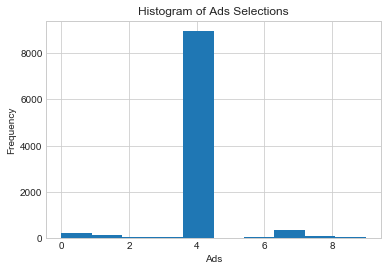

In [19]:
plt.hist(ads_selectors)
plt.title('Histogram of Ads Selections')
plt.xlabel('Ads')
plt.ylabel('Frequency')
plt.show()